# Plotting scene temps

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import geopandas as gpd

/home/caprice/micromamba/envs/summerfog/lib/python3.12/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


files = sorted(glob.glob("*.nc"))
files

In [25]:
#file path
#fn = '2019-08-28T19:01:37.429983000.nc'
fn = 'summer2024/2024-08-17T19:01:04.812884000.nc'

#fn = '2019-08-12T19:01:33.400679000.nc'

In [26]:
#open data set
ds = xr.open_dataset(fn)

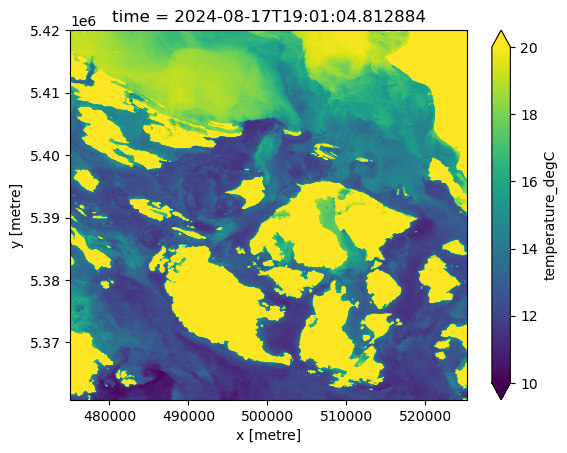

In [28]:
ds['temperature_degC'].plot(vmin=10, vmax=20)

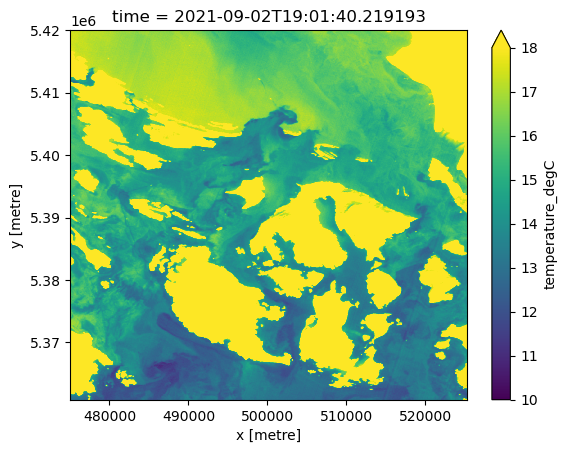

In [18]:
ds['temperature_degC'].plot(vmin = 10, vmax = 18)

# Making SSTs clearer

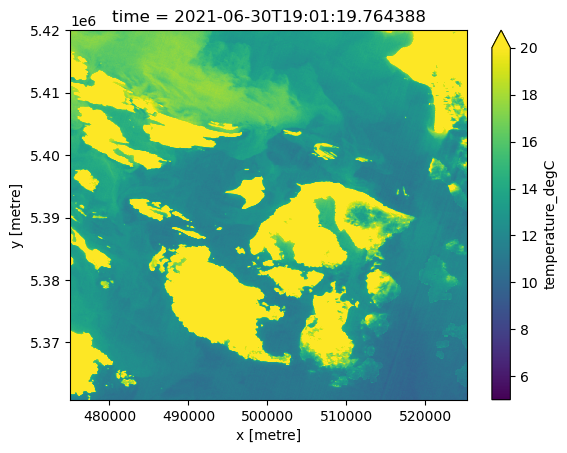

In [12]:
ds['temperature_degC'].plot(cmap='viridis', vmin=5, vmax=20)

# Looking at clouds

In [22]:
# Normalize 3 bands
ds['swir16_normalized'] = ds['swir16'] / np.max(ds['swir16'])
ds['nir08_normalized'] = ds['nir08'] / np.max(ds['nir08'])
ds['blue_normalized'] = ds['blue'] / np.max(ds['blue'])

# Combine bands into an RGB image
rgb_image = np.stack([
    ds['swir16_normalized'].values,
    ds['nir08_normalized'].values,
    ds['blue_normalized'].values
], axis=-1)


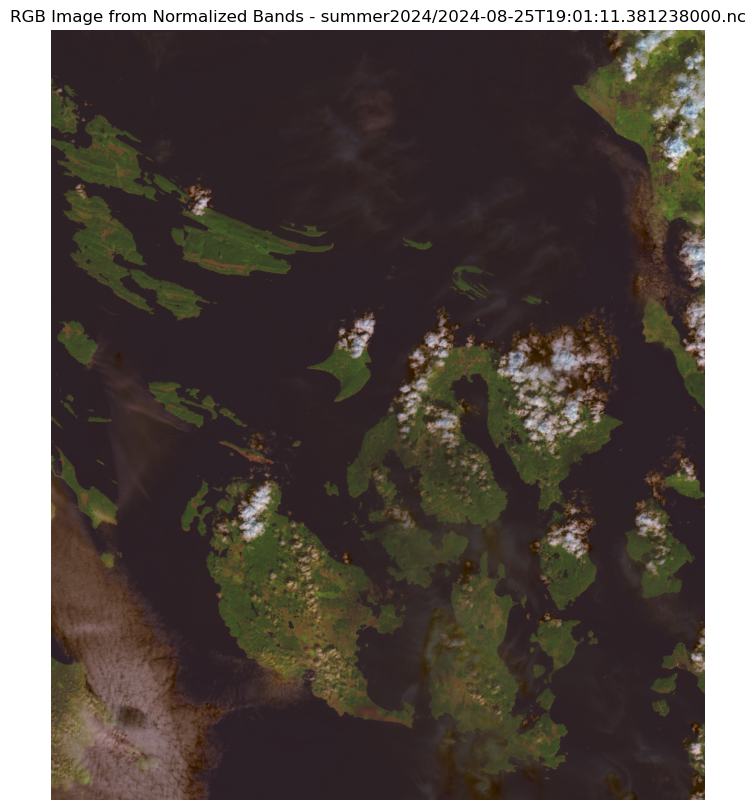

In [23]:
# Plot the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.axis('off')  # Remove axes for better visualization
plt.title("RGB Image from Normalized Bands - " + ds.encoding['source'][32:])
plt.show()

# 